In [1]:
from all import*
bigboy = getBigBoyDataFrame()

In [2]:
bigboy.columns

Index(['amendment_id', 'person_id', 'person_full_name', 'document_eu_id',
       'procedure_interinst_id', 'date', 'policy_area_name', 'policy_area_id',
       'policy_area_level', 'organization_abbr'],
      dtype='object')

In [3]:
itreonly = bigboy.loc[bigboy["organization_abbr"] == "ITRE"]
print(itreonly)

         amendment_id  person_id       person_full_name document_eu_id  \
234                47       1369          Pascal Canfin      PE736.476   
235                50       1369          Pascal Canfin      PE736.476   
236                55       1369          Pascal Canfin      PE736.476   
237                59       1369          Pascal Canfin      PE736.476   
238                66       1369          Pascal Canfin      PE736.476   
...               ...        ...                    ...            ...   
2968638        391584       1452           Nicola Danti      PE754.723   
2968639        391584       2210          Martin Hojsík      PE754.723   
2968640        391584       2353         Andreas Glueck      PE754.723   
2968641        391584       1977            Nicola Beer      PE754.723   
2968642        391589       1838  Zdzisław Krasnodębski      PE754.723   

        procedure_interinst_id        date  \
234             2021/0423(COD)  2022-09-15   
235             202

In [4]:
pedno = itreonly.groupby(itreonly.procedure_interinst_id)

In [5]:
"""
# This is how we can now iterate over procedures
for i, x in pedno:
    do_something(i,x)
"""

'\n# This is how we can now iterate over procedures\nfor i, x in pedno:\n    do_something(i,x)\n'

In [6]:
itre_members = getImportantCommitteeMembers(comm="ITRE")

In [7]:
coh_overtime = []
for i, x in pedno:
    pdedgelist = nx.from_pandas_edgelist(x, source='amendment_id', target = 'person_full_name')
    coh_overtime += [cohesiveness(pdedgelist, pdedgelist)]

print(coh_overtime)

[0.010213032581453634, 0.0058379578246392895, 0.029111338100102146, 0.02702702702702703, 0.018672930123311803, 0.028991596638655463, 0.009821428571428571, 0.021551724137931036, 0.011486421267196983, 0.0107810856541821, 0.02684326710816777, 0.019544159544159546, 0.017402597402597402, 0.01843942783540099, 0.029829712272460365, 0.014868527063649014, 0.012963941038075575, 0.00631398252184769, 0.009445216341768066, 0.011591626981443738, 0.003574509480021291, 0.008706518205461639, 0.031061929722384002, 0.003656045816511605, 0.06471631205673758, 0.024683544303797468, 0.03527336860670194, 0.011707624590514573, 0.020642861250071875, 0.008134733956047864, 0.025634920634920635, 0.020609929078014184, 0.04599686028257457, 0.021096238925600298, 0.024005654436805243, 0.017267460113594202, 0.038559754851889685, 0.01880990325694148, 0.004801762193173643, 0.024154589371980676, 0.005235904286020548, 0.007748114937843897, 0.009567492027089978, 0.011405849421859467, 0.04066985645933014, 0.00430277251841199

In [8]:
coh_df = pd.DataFrame(coh_overtime)

<AxesSubplot:>

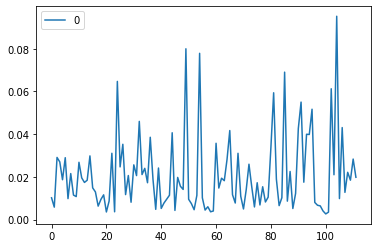

In [9]:
coh_df.plot()

In [10]:
my_committees = ["ITRE", "ENVI", "AFET"]

In [11]:
data_to_plot = {}
for cmtee in my_committees:
    
    cmteeonly = bigboy.loc[bigboy["organization_abbr"] == cmtee]
    cmtee_members = getImportantCommitteeMembers(comm="ITRE")
    pedno = cmteeonly.groupby(cmteeonly.procedure_interinst_id)

    coh_overtime = {}
    for i, x in pedno:
        pdedgelist = nx.from_pandas_edgelist(x, source='amendment_id', target = 'person_full_name')
        coh_overtime[i] = cohesiveness(pdedgelist, pdedgelist)

    data_to_plot[cmtee] = coh_overtime
coh_df = pd.DataFrame(data_to_plot)
coh_df

,ITRE,ENVI,AFET
2019/0151(COD),0.010213,NaN,NaN
2019/0152(COD),0.005838,NaN,NaN
2019/2028(BUD),0.029111,0.036545,0.031609
2019/2156(INI),0.027027,0.011759,NaN
2019/2157(INI),0.018673,0.015279,NaN
...,...,...,...
2023/2118(INI),NaN,NaN,0.005822
2023/2119(INI),NaN,NaN,0.008065
2023/2122(INI),NaN,NaN,0.043317
2023/2126(INI),NaN,NaN,0.007537


<AxesSubplot:>

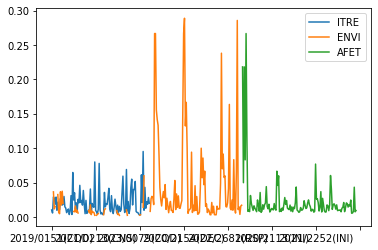

In [12]:
coh_df.plot()

In [13]:
coh_df.sort_index(inplace=True)

<AxesSubplot:>

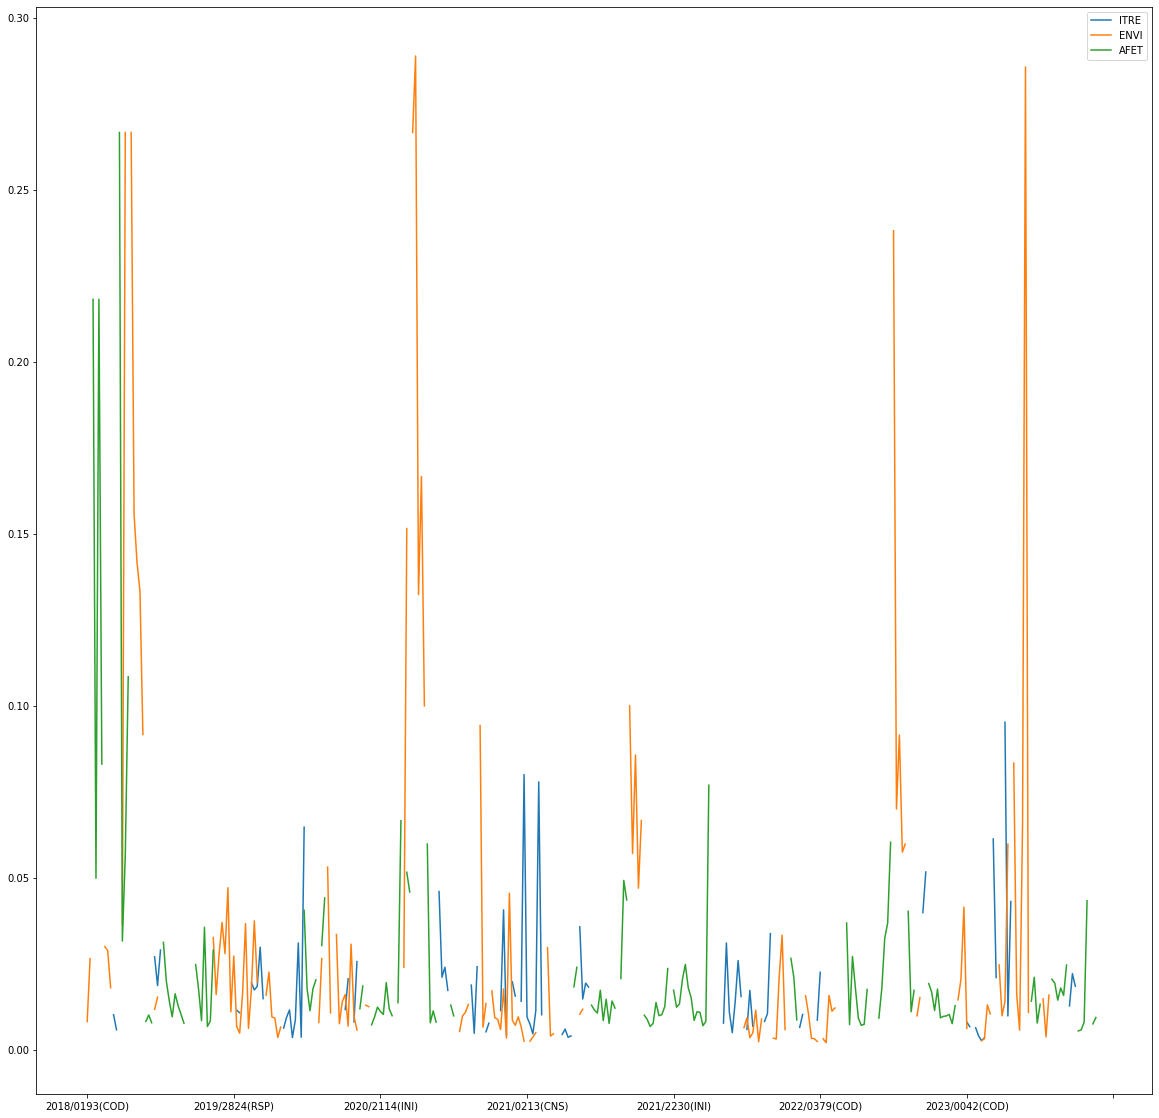

In [14]:
coh_df.plot(figsize=(20,20))

In [15]:
procdate =  getProcedureDateDict()
procdate

{'': '2020-06-30',
 '2012/0060(COD)': '2021-07-27',
 '2013/0186(COD)': '2021-02-05',
 '2016/0062A(NLE)': '2023-04-19',
 '2016/0062B(NLE)': '2023-04-19',
 '2016/0062R(NLE)': '2022-12-08',
 '2016/0132(COD)': '2021-03-19',
 '2016/0224(COD)': '2021-10-11',
 '2017/0035(COD)': '2020-01-31',
 '2017/0114(COD)': '2021-12-14',
 '2017/0121(COD)': '2020-05-13',
 '2017/0122(COD)': '2020-05-13',
 '2017/0123(COD)': '2020-05-13',
 '2017/0237(COD)': '2021-03-02',
 '2017/0360R(NLE)': '2020-05-29',
 '2018/0063A(COD)': '2019-11-29',
 '2018/0107(COD)': '2019-12-09',
 '2018/0108(COD)': '2019-10-24',
 '2018/0131(NLE)': '2021-03-03',
 '2018/0133(NLE)': '2021-03-03',
 '2018/0135(CNS)': '2020-07-09',
 '2018/0136(COD)': '2020-11-19',
 '2018/0193(COD)': '2020-02-19',
 '2018/0213(COD)': '2020-01-09',
 '2018/0329(COD)': '2020-02-21',
 '2018/0330B(COD)': '2019-09-19',
 '2018/0356(NLE)': '2019-10-14',
 '2018/0356M(NLE)': '2019-10-10',
 '2018/0358(NLE)': '2019-10-14',
 '2018/0358M(NLE)': '2019-10-10',
 '2018/0409(NLE)

In [16]:
coh_df.index = coh_df.index.map(lambda x : procdate[x])
coh_df.sort_index(inplace=True)
coh_df

,ITRE,ENVI,AFET
2019-07-24,0.029111,0.036545,0.031609
2019-10-07,NaN,0.016058,NaN
2019-10-10,NaN,NaN,0.049860
2019-10-10,NaN,NaN,0.083060
2019-10-14,NaN,NaN,0.218182
...,...,...,...
2023-10-24,NaN,0.285714,NaN
2023-10-24,NaN,0.016129,NaN
2023-10-25,NaN,0.083333,NaN
2023-10-26,NaN,NaN,0.007782


<AxesSubplot:>

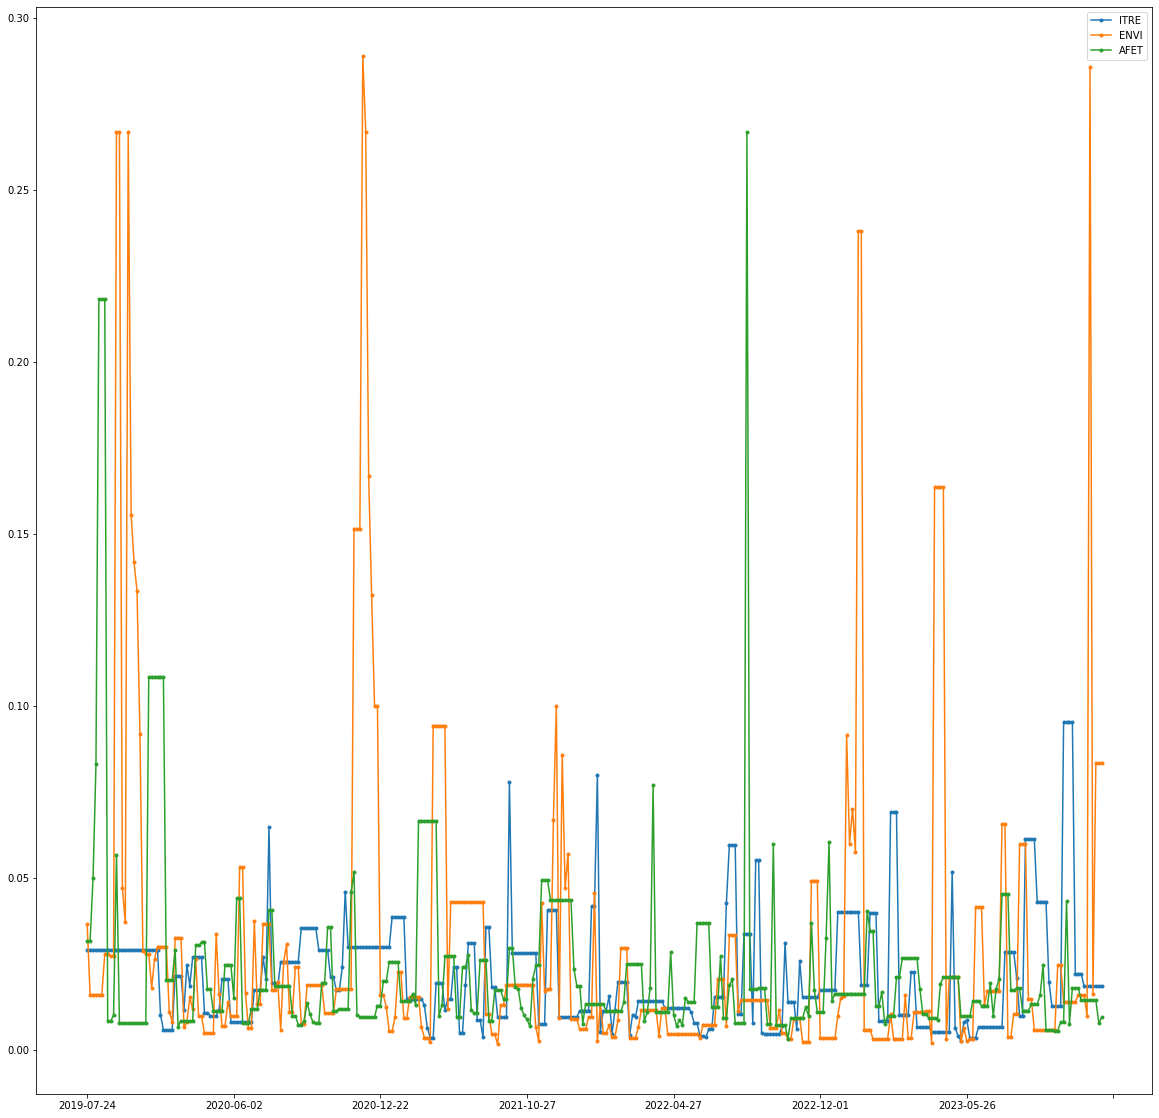

In [17]:
for i in coh_df.columns:
    coh_df[i] = coh_df[i].ffill()
coh_df.plot(figsize=(20,20), linestyle='-', marker='.')